In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

###  一元回归

In [8]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + 0.2  # w: 2, b: 0.2
trY_ = trY + np.random.randn(*trX.shape) * 0.2

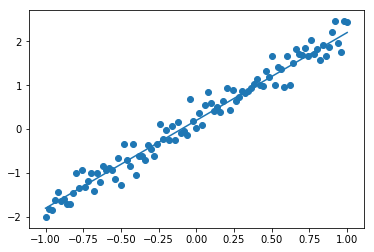

In [9]:
plt.scatter(trX, trY_)
plt.plot(trX, trY)
plt.show()

In [13]:
X = tf.placeholder(dtype=tf.float32, name="X")  # x_train
Y = tf.placeholder(dtype=tf.float32, name="Y")  # y_train
with tf.name_scope("Model"):
    def model(X, w, b):
        return X * w + b
    w = tf.Variable(-1.0, name="w")
    b = tf.Variable(0.0, name="b")
    y_model = model(X, w, b)

with tf.name_scope("CostFunction"):
    cost = tf.reduce_sum(tf.square(Y - y_model))
    
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)
init = tf.global_variables_initializer()

sess = tf.Session()
writer = tf.summary.FileWriter("F:/board/Chap03/", sess.graph)

cost_op = tf.summary.scalar("loss", cost)
merged = tf.summary.merge_all()

sess.run(init)
for i in range(100):
    for x, y in zip(trX, trY_):
        _, cost_summary = sess.run([train_op, cost_op], feed_dict={X: x, Y: y})
        writer.add_summary(cost_summary, i)

writer.close()

In [16]:
print(w.eval(session=sess))
print(b.eval(session=sess))

2.04443
0.22941


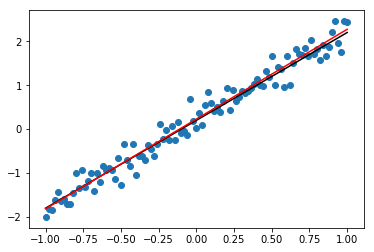

In [17]:
plt.scatter(trX, trY_)
plt.plot(trX, trY, c="black")
plt.plot(trX, sess.run(w) * trX + sess.run(b), c="red")
plt.show()

### 多元回归

In [3]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [4]:
dat = load_boston()
X = dat["data"]
y = dat["target"]
feature_names = dat["feature_names"]

In [5]:
fig, ax = plt.subplots()

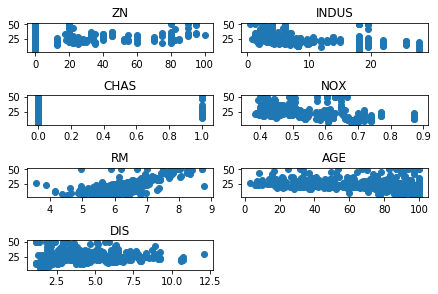

In [6]:
for i in range(1, 8):
    number = 420 + i
    ax.locator_params(nbins=3)
    ax1 = plt.subplot(number)
    plt.title(feature_names[i])
    ax1.scatter(X[:, i], y)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [5]:
cond = np.isin(feature_names, ["INDUS", "AGE"])
xvalues = X[:, cond]
yvalues = y

In [6]:
tf.reset_default_graph()
sess = tf.Session()
X_ = tf.placeholder(dtype=tf.float32, shape=[None, 2], name="X")
y_ = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="y")
log_dir = "F:/board/Chap03/"

In [7]:
epochs = 50
train_rate = 0.001
with tf.name_scope("Model"):
    W = tf.Variable(tf.random_normal(shape=[2, 1], stddev=0.01), name="w")
    b = tf.Variable(tf.random_normal(shape=[1, 1], stddev=0.01), name="b")
    def model(X_, W, b):
        return X_ @ W + b
    y_model = model(X_, W, b)
    
with tf.name_scope("Cost"):
    cost = tf.reduce_mean(tf.pow(y_ - y_model, 2))

train_op = tf.train.AdamOptimizer(train_rate).minimize(cost)
cost_op = tf.summary.scalar("loss", cost)
merged = tf.summary.merge_all()

In [8]:
train_writer = tf.summary.FileWriter(log_dir + "train", sess.graph)    
test_writer = tf.summary.FileWriter(log_dir + "test")
init = tf.global_variables_initializer()

sess.run(init)
for i in range(epochs):
    xvalues, yvalues = shuffle(xvalues, yvalues)
    cost_ = 0.
    for batch_x, batch_y in zip(xvalues, yvalues):
        _, summary, c = sess.run([train_op, merged, cost], 
                        feed_dict={X_: batch_x.reshape(1, 2), y_: batch_y.reshape(1, 1)})
        cost_ += c
    cost_ /= len(xvalues) 
    test_writer.add_summary(summary, i)
    print("epoch: %d, cost: %.4f" % (i + 1, cost_))

train_writer.close()
test_writer.close()


epoch: 1, cost: 284.8550
epoch: 2, cost: 213.2111
epoch: 3, cost: 210.3008
epoch: 4, cost: 207.1618
epoch: 5, cost: 204.5301
epoch: 6, cost: 202.2679
epoch: 7, cost: 199.8407
epoch: 8, cost: 197.7713
epoch: 9, cost: 195.5882
epoch: 10, cost: 193.0037
epoch: 11, cost: 191.7025
epoch: 12, cost: 190.2992
epoch: 13, cost: 188.5402
epoch: 14, cost: 187.0526
epoch: 15, cost: 185.7095
epoch: 16, cost: 183.4689
epoch: 17, cost: 182.5065
epoch: 18, cost: 180.8417
epoch: 19, cost: 179.8918
epoch: 20, cost: 178.2820
epoch: 21, cost: 177.2231
epoch: 22, cost: 175.7762
epoch: 23, cost: 174.5513
epoch: 24, cost: 173.0892
epoch: 25, cost: 172.0043
epoch: 26, cost: 170.8061
epoch: 27, cost: 169.3917
epoch: 28, cost: 168.3072
epoch: 29, cost: 166.8192
epoch: 30, cost: 166.3333
epoch: 31, cost: 164.5678
epoch: 32, cost: 163.9499
epoch: 33, cost: 161.9987
epoch: 34, cost: 161.8114
epoch: 35, cost: 160.6142
epoch: 36, cost: 159.6880
epoch: 37, cost: 158.3513
epoch: 38, cost: 157.2731
epoch: 39, cost: 156.

In [9]:
W.eval(session=sess)

array([[-0.5194744 ],
       [ 0.24458228]], dtype=float32)

In [10]:
b.eval(session=sess)

array([[7.5931306]], dtype=float32)